In [1]:
import sklearn
sklearn.__version__

'1.7.2'

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [3]:
import os
os.getcwd()

'/home/dafemo'

In [4]:
# load Dataset

data = pd.read_csv("/home/dafemo/Downloads/student_performance.csv")
data

,study_hours,attendance,previous_score,final_result
0,4.1,68,44,0
1,7.5,60,53,0
2,6.7,92,31,0
3,7.4,69,67,0
4,0.5,99,50,0
...,...,...,...,...
115,6.0,61,80,0
116,4.9,61,87,0
117,8.7,88,81,1
118,0.9,54,83,0


In [5]:
# print the first five rows
data.head()

,study_hours,attendance,previous_score,final_result
0,4.1,68,44,0
1,7.5,60,53,0
2,6.7,92,31,0
3,7.4,69,67,0
4,0.5,99,50,0


In [6]:
# show the Dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     120 non-null    float64
 1   attendance      120 non-null    int64  
 2   previous_score  120 non-null    int64  
 3   final_result    120 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


In [7]:
# Describe the Dataset
data.describe()

,study_hours,attendance,previous_score,final_result
count,120.000000,120.000000,120.000000,120.000000
mean,5.690833,69.075000,63.816667,0.225000
std,2.791433,18.024802,18.728033,0.419333
min,0.500000,40.000000,30.000000,0.000000
25%,3.600000,54.000000,50.000000,0.000000
50%,5.900000,69.500000,65.000000,0.000000
75%,8.225000,84.250000,80.000000,0.000000
max,9.900000,99.000000,93.000000,1.000000


In [8]:
# Checking the Missing values
data.isnull().sum()

study_hours       0
attendance        0
previous_score    0
final_result      0
dtype: int64

In [9]:
# Define Features and Targets
X = data[['study_hours', 'attendance', 'previous_score',]]
y = data['final_result']

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Predictions (Linear Regression)
lr_predictions = lr_model.predict(X_test)

In [13]:
# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Performance")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

Linear Regression Performance
MAE: 0.22426313425969738
MSE: 0.07183501359887524
R2 Score: 0.3432227328102835


In [14]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [15]:
# Predictions (Decision Tree)
dt_predictions = dt_model.predict(X_test)

In [16]:
# Evaluate Decision Tree
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Performance")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("R2 Score:", dt_r2)

Decision Tree Performance
MAE: 0.0
MSE: 0.0
R2 Score: 1.0


In [18]:
# Performance Comparison Table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAE': [lr_mae, dt_mae],
    'MSE': [lr_mse, dt_mse],
    'R2 Score': [lr_r2, dt_r2]
})

results

,Model,MAE,MSE,R2 Score
0,Linear Regression,0.224263,0.071835,0.343223
1,Decision Tree,0.000000,0.000000,1.000000


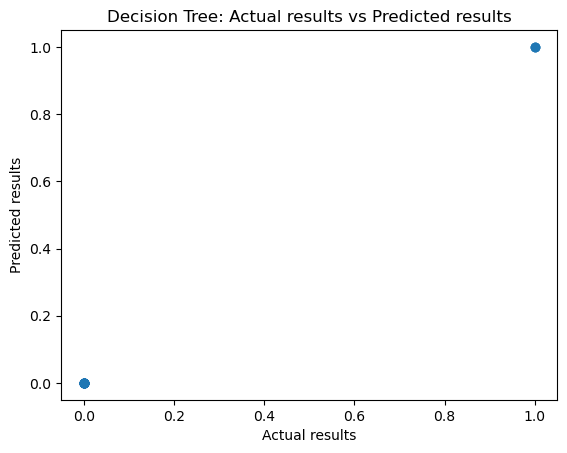

In [19]:
# Actual vs Predicted (Best Model)
plt.figure()
plt.scatter(y_test, dt_predictions)
plt.xlabel("Actual results")
plt.ylabel("Predicted results")
plt.title("Decision Tree: Actual results vs Predicted results")
plt.show()

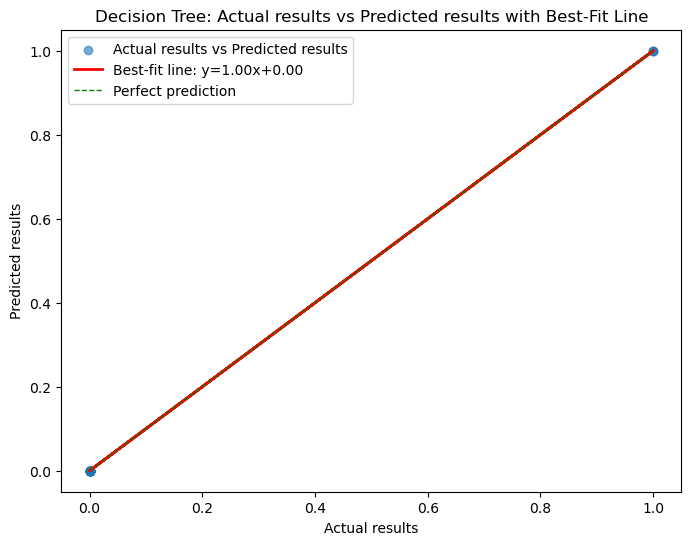

In [20]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, dt_predictions, alpha=0.6, label='Actual results vs Predicted results')

# Best-fit line
slope, intercept = np.polyfit(y_test, dt_predictions, 1)  # Fit y = mx + b
best_fit_line = slope * y_test + intercept
plt.plot(y_test, best_fit_line, color='red', linewidth=2, label=f'Best-fit line: y={slope:.2f}x+{intercept:.2f}')

# Optional: perfect prediction line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=1, label='Perfect prediction')

# Labels and title
plt.xlabel("Actual results")
plt.ylabel("Predicted results")
plt.title("Decision Tree: Actual results vs Predicted results with Best-Fit Line")
plt.legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)  # X_train and y_train must exist


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


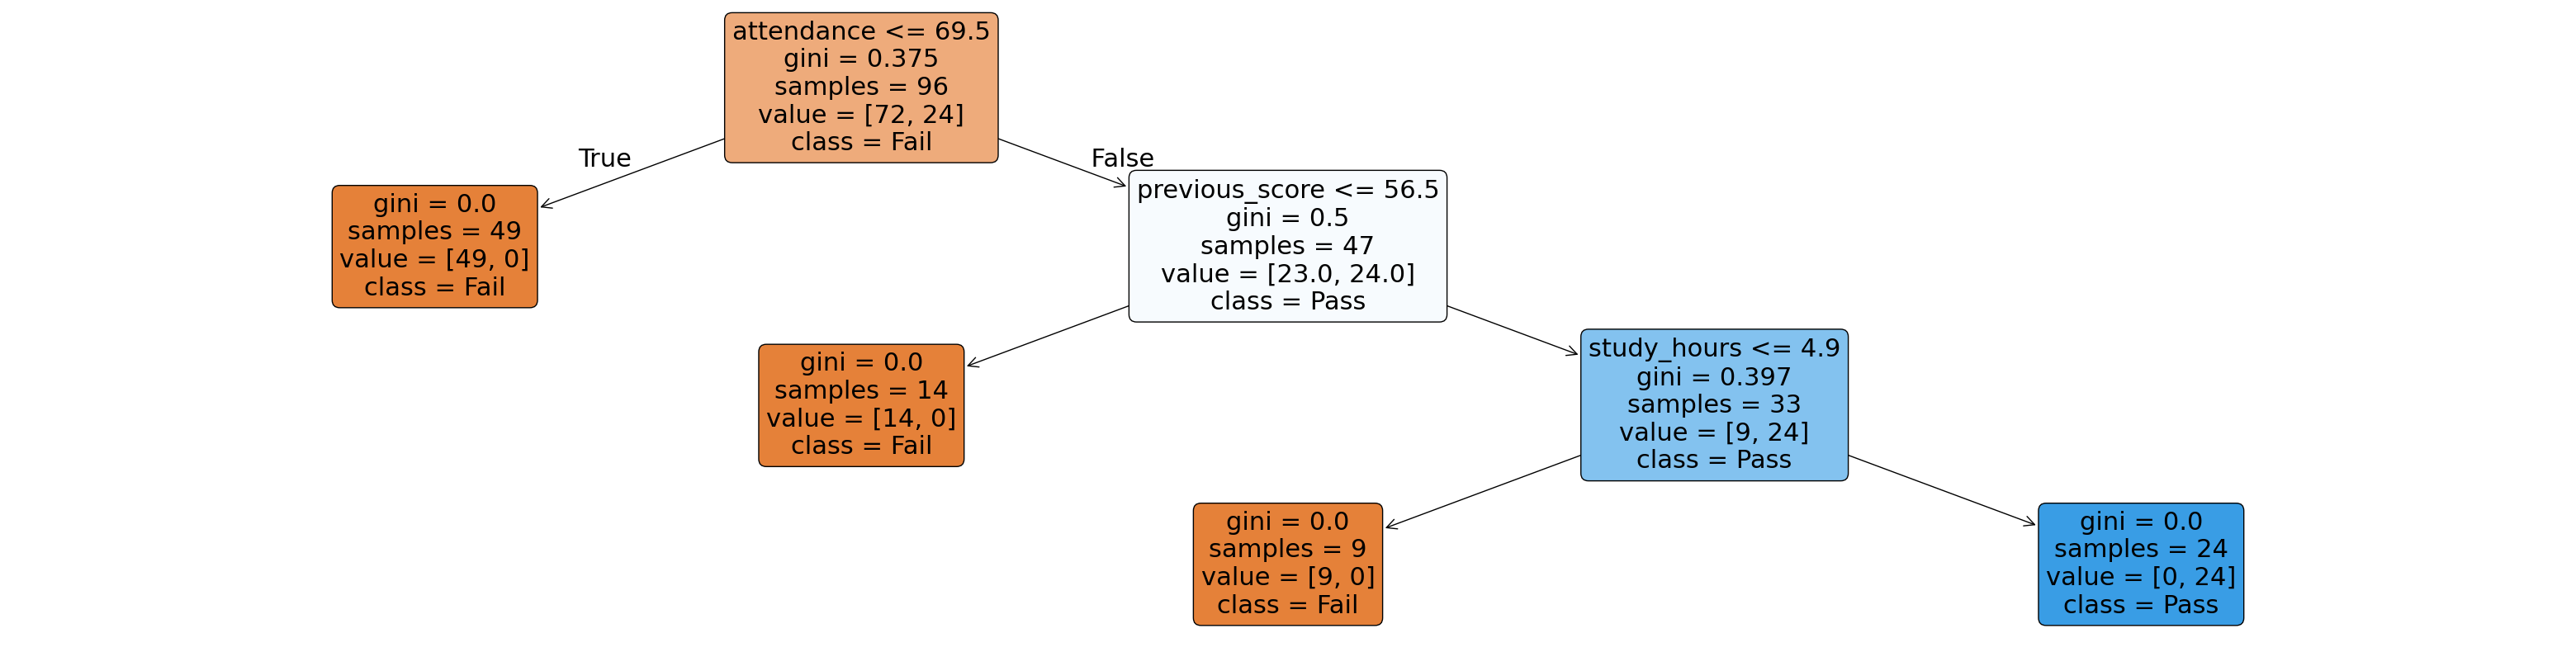

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,10))
plot_tree(tree_model, 
          feature_names=X.columns, 
          class_names=['Fail','Pass'],  # Change based on your actual target values
          filled=True, 
          rounded=True)
plt.show()

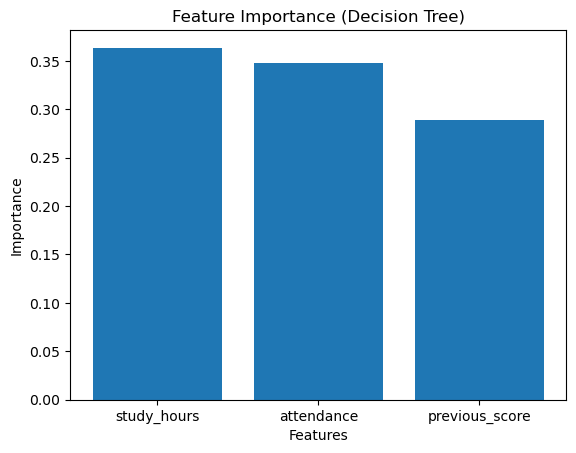

In [28]:
# Feature Importance (Decision Tree)
importance = dt_model.feature_importances_

plt.figure()
plt.bar(X.columns, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.show()

In [29]:
# Select Best Model
best_model = dt_model
best_model

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
# Save Best Model
pickle.dump(best_model, open("model.pkl", "wb"))

In [24]:
# Conclusion
print("Decision Tree performed better than Linear Regression.")
print("The model has been saved and is ready for deployment.")

Decision Tree performed better than Linear Regression.
The model has been saved and is ready for deployment.
